In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize']=12,8

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df.shape

(10000, 14)

In [16]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [17]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [20]:
df.sample(n=8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1035,1036,15652955,Price,678,Spain,Male,30,0,0.00,1,1,0,35113.08,0
47,48,15771573,Okagbue,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
9121,9122,15693526,Ku,618,France,Female,40,0,0.00,1,1,0,119059.13,0
7095,7096,15783883,Onwuka,753,Germany,Female,38,1,117314.92,1,1,0,122021.33,1
324,325,15682757,Pardey,734,France,Male,30,3,0.00,2,1,0,107640.25,0
5959,5960,15665629,Chiang,719,Spain,Female,33,7,0.00,2,1,0,20016.59,0
193,194,15702741,Potts,601,France,Male,32,8,93012.89,1,1,0,86957.42,0
5649,5650,15752956,Stanley,629,Spain,Male,29,6,0.00,2,1,1,88842.80,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [23]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [24]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [26]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

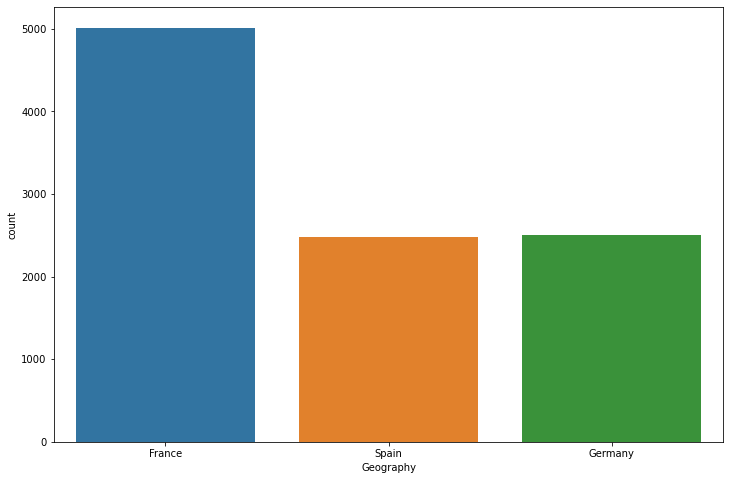

In [28]:
sns.countplot(df['Geography'])

<AxesSubplot:xlabel='Geography', ylabel='count'>

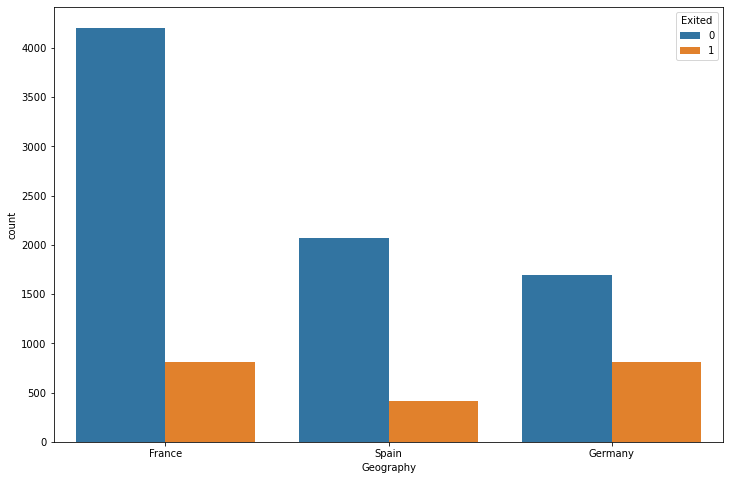

In [29]:
sns.countplot(df['Geography'], hue=df['Exited'])

In [30]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

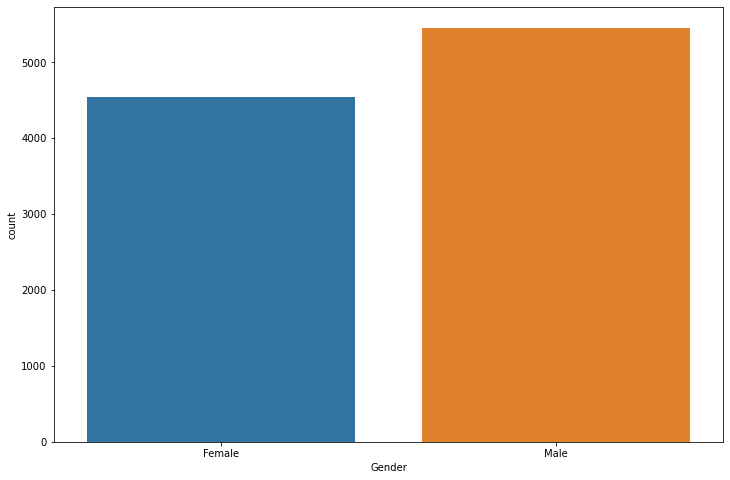

In [31]:
sns.countplot(df['Gender'], label=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

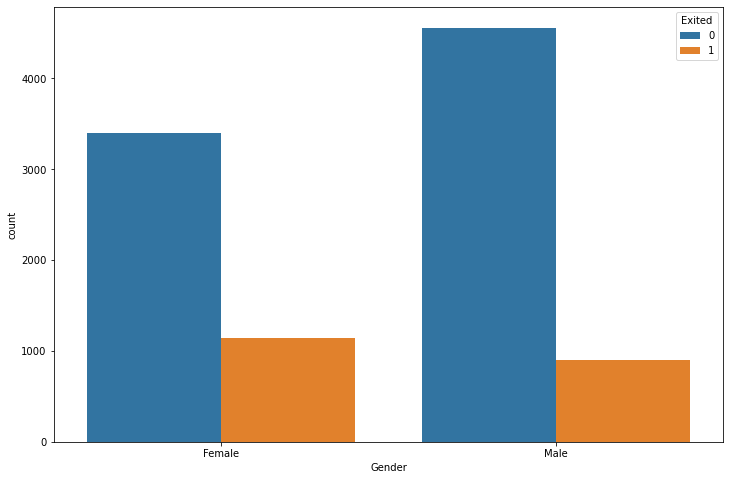

In [32]:
sns.countplot(df['Gender'],hue=df['Exited'])

In [33]:
df['Geography'].replace({'France':0,
                         'Germany':1,
                        'Spain':2}, inplace=True)
df['Gender'].replace({'Male': 0,
                      'Female': 1},inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [35]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [19]:
X=df.drop('Exited', axis=1)
Y=df['Exited']

In [20]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64
9996,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,1,36,7,0.00,1,0,1,42085.58
9998,772,1,0,42,3,75075.31,2,1,0,92888.52


In [21]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

In [23]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2694,628,1,0,29,3,113146.98,2,0,1,124749.08
5140,626,0,1,29,4,105767.28,2,0,0,41104.82
2568,612,1,1,47,6,130024.87,1,1,1,45750.21
3671,646,1,1,52,6,111739.40,2,0,1,68367.18
7427,714,2,0,33,8,122017.19,1,0,0,162515.17
...,...,...,...,...,...,...,...,...,...,...
2895,621,1,0,47,7,107363.29,1,1,1,66799.28
7813,684,1,1,63,3,81245.79,1,1,0,69643.31
905,672,0,1,45,9,0.00,1,1,1,92027.69
5192,663,0,1,39,8,0.00,2,1,1,101168.90


In [24]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9953,550,0,0,47,2,0.00,2,1,1,97057.28
3850,680,0,0,34,3,143292.95,1,1,0,66526.01
4962,531,0,1,42,2,0.00,2,0,1,90537.47
3886,710,1,0,34,8,147833.30,2,0,1,1561.58
5437,543,1,0,30,6,73481.05,1,1,1,176692.65
...,...,...,...,...,...,...,...,...,...,...
3919,763,2,1,39,7,0.00,2,1,0,19458.75
162,800,0,1,49,7,108007.36,1,0,0,47125.11
7903,567,2,0,34,10,0.00,2,0,1,161571.79
2242,621,1,1,30,2,101014.08,2,1,1,165257.31


In [25]:
Y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [26]:
Y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

# Logistic Regression

In [27]:
LogReg_model=LogisticRegression()

In [28]:
LogReg_model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
Y_pred_LogReg=LogReg_model.predict(X_test)

In [30]:
confusion_matrix(Y_pred_LogReg,Y_test)

array([[1554,  398],
       [  31,   17]], dtype=int64)

In [31]:
accuracy_score(Y_pred_LogReg,Y_test)

0.7855

In [32]:
precision_score(Y_pred_LogReg,Y_test)

0.04096385542168675

In [33]:
recall_score(Y_pred_LogReg,Y_test)

0.3541666666666667

In [34]:
roc_auc_score(Y_pred_LogReg,Y_test)

0.575136612021858

In [35]:
clf_report=classification_report(Y_pred_LogReg, Y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1952
           1       0.04      0.35      0.07        48

    accuracy                           0.79      2000
   macro avg       0.51      0.58      0.48      2000
weighted avg       0.96      0.79      0.86      2000



In [36]:
LogReg_model.predict_proba(X_test)

array([[0.70415865, 0.29584135],
       [0.81814447, 0.18185553],
       [0.72593591, 0.27406409],
       ...,
       [0.83324575, 0.16675425],
       [0.84326634, 0.15673366],
       [0.64524048, 0.35475952]])

In [39]:
fpr, tpr =roc_curve(Y_pred_LogReg, Y_test)

ValueError: too many values to unpack (expected 2)

In [37]:
plt.plot(fpr, tpr)

NameError: name 'fpr' is not defined

# Decision Tree

In [60]:
DT_model=DecisionTreeClassifier()

In [61]:
parameters={'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_depth':[1,2,3,4,5,6],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[1,2,3,4,5,6,7]}

In [64]:
DT_gscv=GridSearchCV(DT_model,parameters, cv=10)
DT_gscv

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [67]:
DT_gscv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [68]:
DT_gscv.best_estimator_

DecisionTreeClassifier(ccp_alpha=1, max_depth=1, max_features='auto')

In [69]:
DT_gscv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [84]:
DT_best_model=DecisionTreeClassifier(ccp_alpha = 1,
                                     criterion = 'gini',
                                     max_depth= 1,
                                     max_features= 'auto',
                                     splitter = 'best')

In [85]:
DT_best_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=1, max_depth=1, max_features='auto')

In [86]:
Y_pred_DT=DT_best_model.predict(X_test)
Y_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

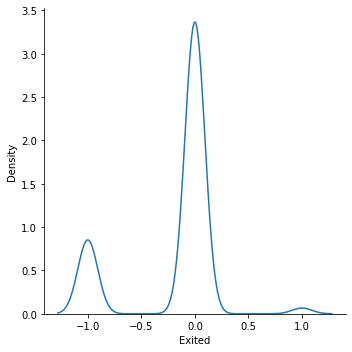

In [87]:
sns.displot(Y_pred_test - Y_test, kind='kde')

In [88]:
confusion_matrix(Y_pred_test, Y_test)

array([[1554,  398],
       [  31,   17]], dtype=int64)

In [89]:
accuracy_score(Y_pred_test, Y_test)

0.7855

In [90]:
precision_score(Y_pred_test, Y_test)

0.04096385542168675

In [91]:
recall_score(Y_pred_test, Y_test)

0.3541666666666667

In [92]:
roc_auc_score(Y_pred_test, Y_test)

0.575136612021858

In [93]:
clf_report=classification_report(Y_pred_test, Y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1952
           1       0.04      0.35      0.07        48

    accuracy                           0.79      2000
   macro avg       0.51      0.58      0.48      2000
weighted avg       0.96      0.79      0.86      2000



# Random Forest

In [98]:
RF_model=RandomForestClassifier()

In [108]:
parameters={'n_estimators': np.arange(10,20),
            'criterion': ['gini','entropy'],
            'max_depth': np.arange(1,8),
            'min_samples_split': np.arange(1,8)}

In [109]:
RF_gscv=GridSearchCV(RF_model,parameters,cv=5)

In [110]:
RF_gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [111]:
RF_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 6,
 'n_estimators': 14}

In [114]:
RF_best_model=RandomForestClassifier(n_estimators = 14,
                                     criterion = 'gini',
                                     max_depth = 7,
                                     min_samples_split = 6)

In [116]:
RF_best_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_split=6, n_estimators=14)

In [117]:
Y_pred_RF=RF_best_model.predict(X_test)
Y_pred_RF

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
confusion_matrix(Y_pred_RF, Y_test)

array([[1562,  258],
       [  23,  157]], dtype=int64)

In [119]:
accuracy_score(Y_pred_RF, Y_test)

0.8595

In [120]:
precision_score(Y_pred_RF, Y_test)

0.3783132530120482

In [121]:
recall_score(Y_pred_RF, Y_test)

0.8722222222222222

In [122]:
roc_auc_score(Y_pred_RF, Y_test)

0.8652319902319903

In [123]:
clf_report=classification_report(Y_pred_RF, Y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1820
           1       0.38      0.87      0.53       180

    accuracy                           0.86      2000
   macro avg       0.68      0.87      0.72      2000
weighted avg       0.93      0.86      0.88      2000



# Support Vector Machine

In [131]:
SVM_model=SVC()

In [135]:
parameters={'C': np.arange(1,20),
            'kernel': ['linear', 'poly']}

In [136]:
SVM_gscv= GridSearchCV(SVM_model,parameters,cv=5)

In [ ]:
SVM_gscv.fit(X_train,Y_train)

In [ ]:
SVM_gscv.best_params_

In [ ]:
SVM_best_model=SVC(C= , kernel= '')

In [ ]:
SVM_best_model.fit(X_train,Y_train)

In [74]:
Y_pred_SVM=SVM_best_model.predict(X_test)
Y_pred_SVM

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
confusion_matrix(Y_pred_SVM, Y_test)

array([[1585,  415],
       [   0,    0]], dtype=int64)

In [76]:
accuracy_score(Y_pred_SVM, Y_test)

0.7925

In [77]:
precision_score(Y_pred_SVM, Y_test)

0.0

In [78]:
recall_score(Y_pred_SVM, Y_test)

0.0

In [79]:
roc_auc_score(Y_pred_SVM, Y_test)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [81]:
clf_report=classification_report(Y_pred_SVM, Y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.79      0.88      2000

